# Report

In this notebook we report progress on the project of house price prediction.

In [1]:
import os
from functools import partial

In [2]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [3]:
import data
import metrics

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
def evaluate_model(*, model, metric, X_train, y_train, X_test, y_test):
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_error = metric(y_train, train_predictions)
    test_error = metric(y_test, test_predictions)
    return {
        "train_predictions": train_predictions,
        "test_predictions": test_predictions,
        "train_error": train_error,
        "test_error": test_error
    }

def print_report(*, model, evaluation):
    print(f"Model used:\n\t{reg}")
    print(f"Error:\n\ttrain set {evaluation['train_error']}\n\ttest error: {evaluation['test_error']}")

In [6]:
models_dir = "models"
dataset_path = "./data/train_classification.csv"
dataset = data.get_dataset(
    partial(pd.read_csv, filepath_or_buffer=dataset_path),
    splits=("train", "test")
)

**If you need to visualize anything from your training data, do it here**

In [10]:
X_train_classification = pd.read_csv("./data/train_classification.csv")

In [11]:
X_train_classification.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,y
0,54,1,2,150,232,0,0,165,0,1.6,2,0,3,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
3,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
4,58,1,0,100,234,0,1,156,0,0.1,2,1,3,0


In [25]:
X_train_classification[['y','thalachh']].groupby('y').mean().mean().thalachh

149.1722644080997

<AxesSubplot:>

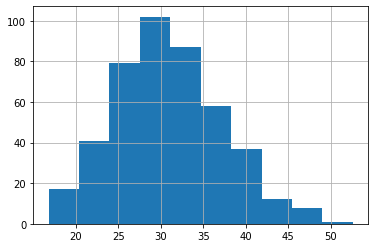

In [46]:
X_test_regression["bmi"].hist()

## Baseline

In [29]:
from sklearn.metrics import f1_score

model_path = os.path.join("models", "baseline", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=f1_score,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('average-thalachh', AverageThalachh())])
Error:
	train set 0.7484662576687117
	test error: 0.6229508196721312


## Linear Regression Model 

We want to try easy things first, so know lets see how a linear regression model does.

In [28]:
from sklearn.metrics import f1_score

model_path = os.path.join("models", "logistic-regression", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=f1_score,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('categorical-encoder',
                 CategoricalEncoder(force_dense_array=True, one_hot=True)),
                ('standard-scaler', StandardScaler()),
                ('logistic-regressor', LogisticRegression())])
Error:
	train set 0.9382716049382716
	test error: 0.8275862068965517


**Error Analysis**

What can you learn about the errors your model is making? Try this:

* Discretize the errors your model is making by some categorical variables.
* Sort and discretize the errors your model is making and see what the features have in common in those cases. 

In [31]:
y_predictions_LR = reg.predict(X_test_regression)
y_predictions_LR = pd.DataFrame(y_predictions_LR, columns = ['y_pred'])
y_predictions_LR.to_csv(path_or_buf="./data/y_predictions_LR.csv", sep=',', index=False ,float_format='%.15f')

## Linear regression with Feature Engineering

Probably the previous model is not good enough, let's see how is the performance of a model using some produced features.

Techniques:
1. Feature Cross
2. Discretizer
3. Add average per neighborhood.


In [51]:
model_path = os.path.join("models", "Linear regression features", "model.joblib")
reg = joblib.load(model_path)
evaluation = evaluate_model(
    model=reg,
    metric=metrics.custom_error,
    X_train=dataset["train"][0],
    y_train=dataset["train"][1],
    X_test=dataset["test"][0],
    y_test=dataset["test"][1]
)
print_report(model=reg, evaluation=evaluation)

Model used:
	Pipeline(steps=[('average-charges-extractor',
                 AverageChargesPerRegionExtractor()),
                ('discretizer',
                 Discretizer(bins_per_column={'bmi': 2}, strategy='kmeans')),
                ('categorical-encoder',
                 CategoricalEncoder(force_dense_array=True, one_hot=True)),
                ('standard-scaler', StandardScaler()),
                ('linear-regressor', LinearRegression())])
Error:
	train set 4482.200870028673
	test error: 4438.070034238123


In [56]:
y_predictions_LRF = reg.predict(X_test_regression)
y_predictions_LRF = list(y_predictions_LRF)
y_predictions_LRF

[8231.21680349153,
 5795.325367967096,
 36322.41479777629,
 9509.891945539726,
 28679.406670600463,
 9057.949948683734,
 1191.3133574690892,
 17922.486462341534,
 3216.982152946355,
 10322.364653274668,
 27175.794238904477,
 7950.659445957905,
 3637.466050272278,
 36139.79401394883,
 39315.99935664114,
 36205.50692983689,
 13412.154318991716,
 35609.4053514279,
 8241.478060770285,
 30635.105843631696,
 3287.884875110338,
 11700.479391912144,
 637.3828595225332,
 5745.128967939374,
 10202.19863080091,
 14411.504517112093,
 15503.27850397758,
 3973.241204833019,
 8772.865275314824,
 844.278393605975,
 6754.146835376061,
 15635.726552574597,
 5418.853073418419,
 4785.713912567962,
 2738.26383092765,
 12365.07665229267,
 993.1523929840096,
 6951.285583040253,
 33277.6352868601,
 33021.32901478519,
 1271.949201255049,
 6752.979874075923,
 14625.092880354574,
 12415.27305232039,
 9469.95680279076,
 11675.463616012015,
 6296.276699802456,
 2486.671976677768,
 35327.32130621389,
 8928.30833096

In [61]:
import json

nombres = "CarlosArbelaez;JimmyRomero;AlbertoLizcano;DavidRodriguez"
mails = "carlos.arbelaezg@udea.edu.co"
URL = "https://qzbbjszmjk.execute-api.us-east-1.amazonaws.com/dev"

results = {"id": nombres ,"email": mails, "task_type": "Regression" ,"predictions": y_predictions_LRF}
headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}

r = requests.post(url= URL+"/benchmarkin/", data = json.dumps(results) , headers=headers)

In [62]:
r.text

'{"MAE":4236.505815492495}'

In [ ]:
y_predictions_LRF.to_csv(path_or_buf="./data/y_predictions_LRF.csv", sep=',', index=False ,float_format='%.15f')

**Error Analysis**

What can you learn about the errors your model is making? Try this:

* Discretize the errors your model is making by some categorical variables.
* Sort or discretize the errors your model is making and see what the features have in common in those cases. 

### Carreta asociada